Questions to explore
Is the suicide rate more prominent in some age categories than others?
Which countries have the most and the least number of suicides?
What is the effect of the population on suicide rates?
What is the effect of the GDP of a country on suicide rates?
What is the trend of suicide rates across all the years?
Is there a difference between the suicide rates of men and women?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('~/desktop/suicide_data.csv')

Check the data for missing values

In [40]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [42]:
data.shape

(27820, 12)

In [44]:
# ~27,000 rows and 12 columns

In [46]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [50]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # percent of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #putting the above two together
    return missing_data #return the dataframe
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [54]:
data[['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']].describe() #descriptive stats of the continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [38]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Is the suicide rate more prominent in some age categories than others?
- The data shows that the rate of suicide increases with age
- The rate of suicide in people ages 35-54 are most prominent
- Suicide rates are lowest amoung children from 5 - 14 years old

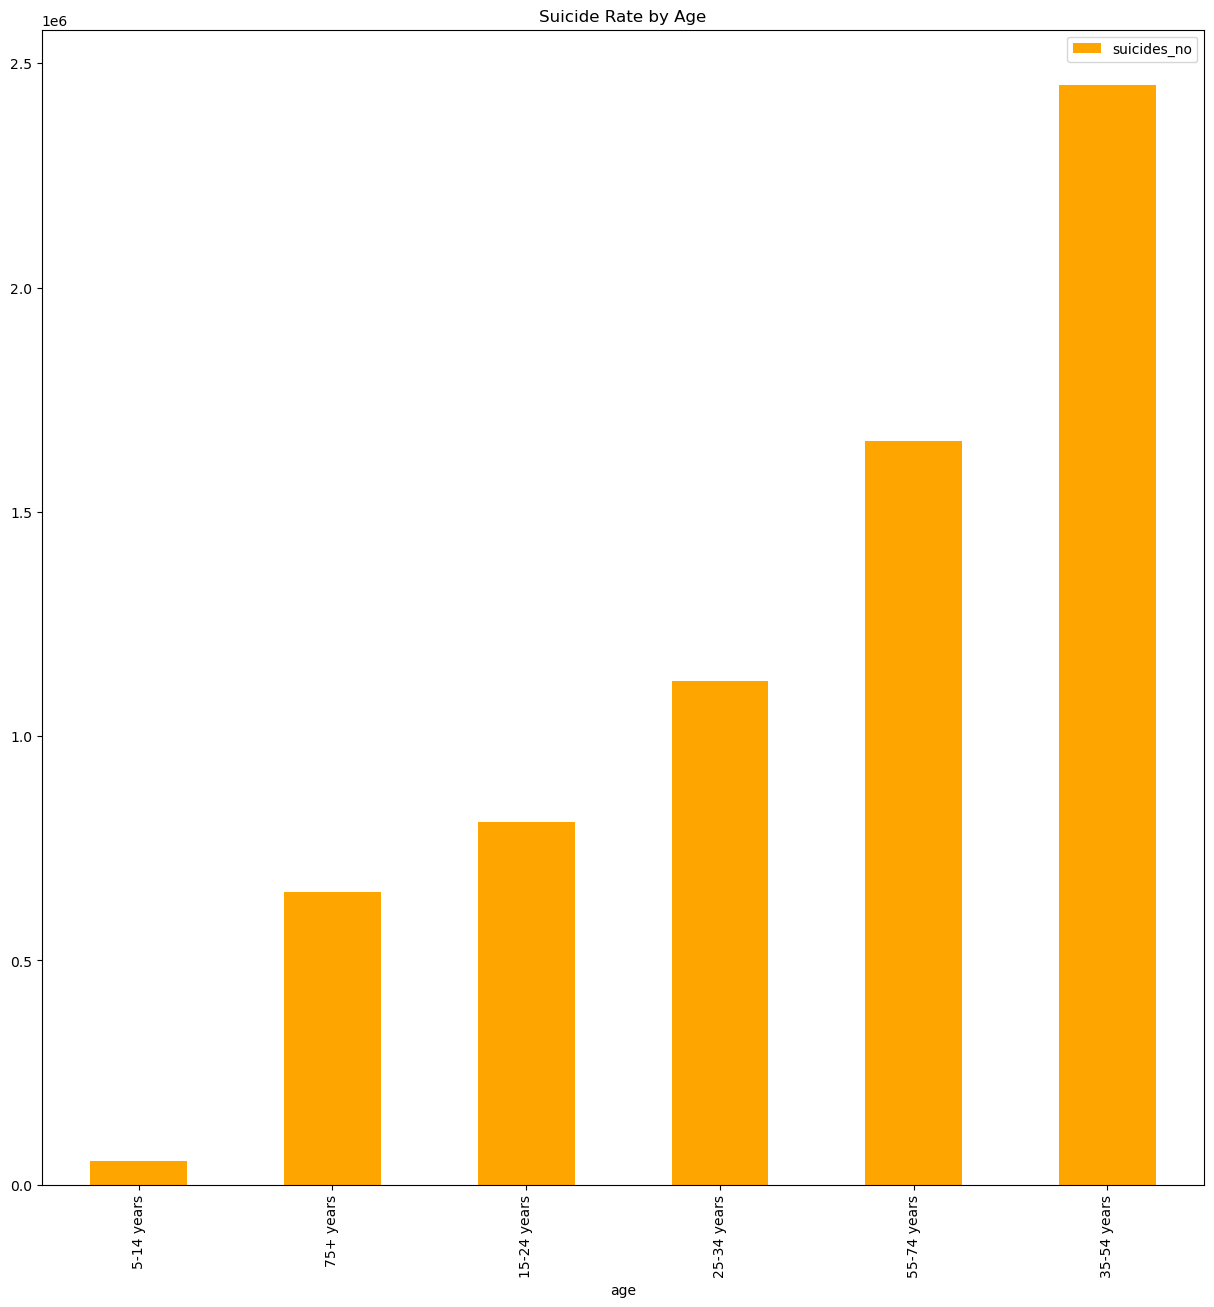

In [61]:
data.groupby(by=['age'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='age',y='suicides_no', title='Suicide Rate by Age',kind='bar', color = 'orange', figsize=(15,15))
plt.show()

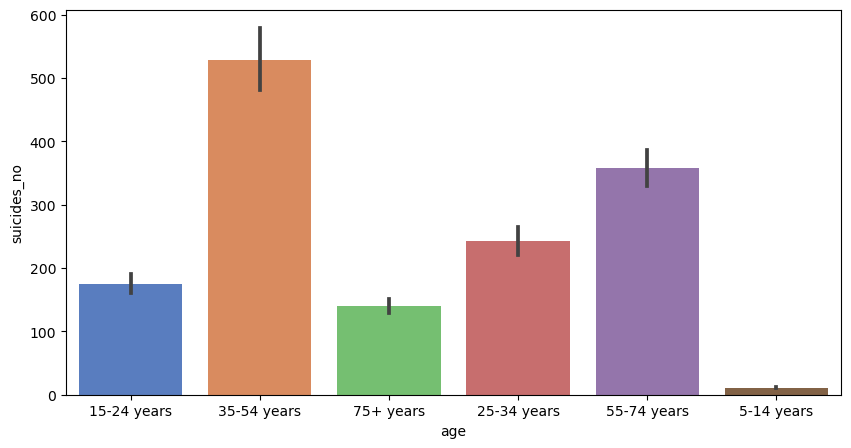

In [71]:
# Other code that works for this:

plt.figure(figsize=(10,5))
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')


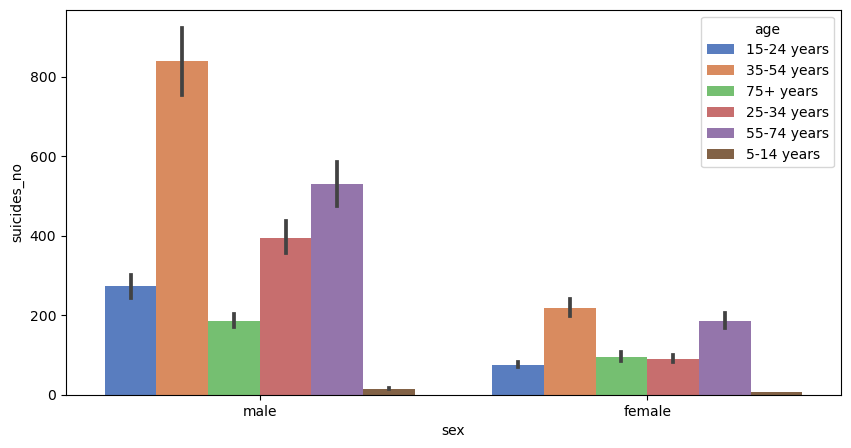

In [14]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='sex', y='suicides_no', hue = 'age', data=data, palette='muted')
plt.show()

Which countries have the most and the least number of suicides?
- Russia has the highest number of suicides, followed by the United States and Japan
- The United Kingdom and Poland have the least number of suicides 

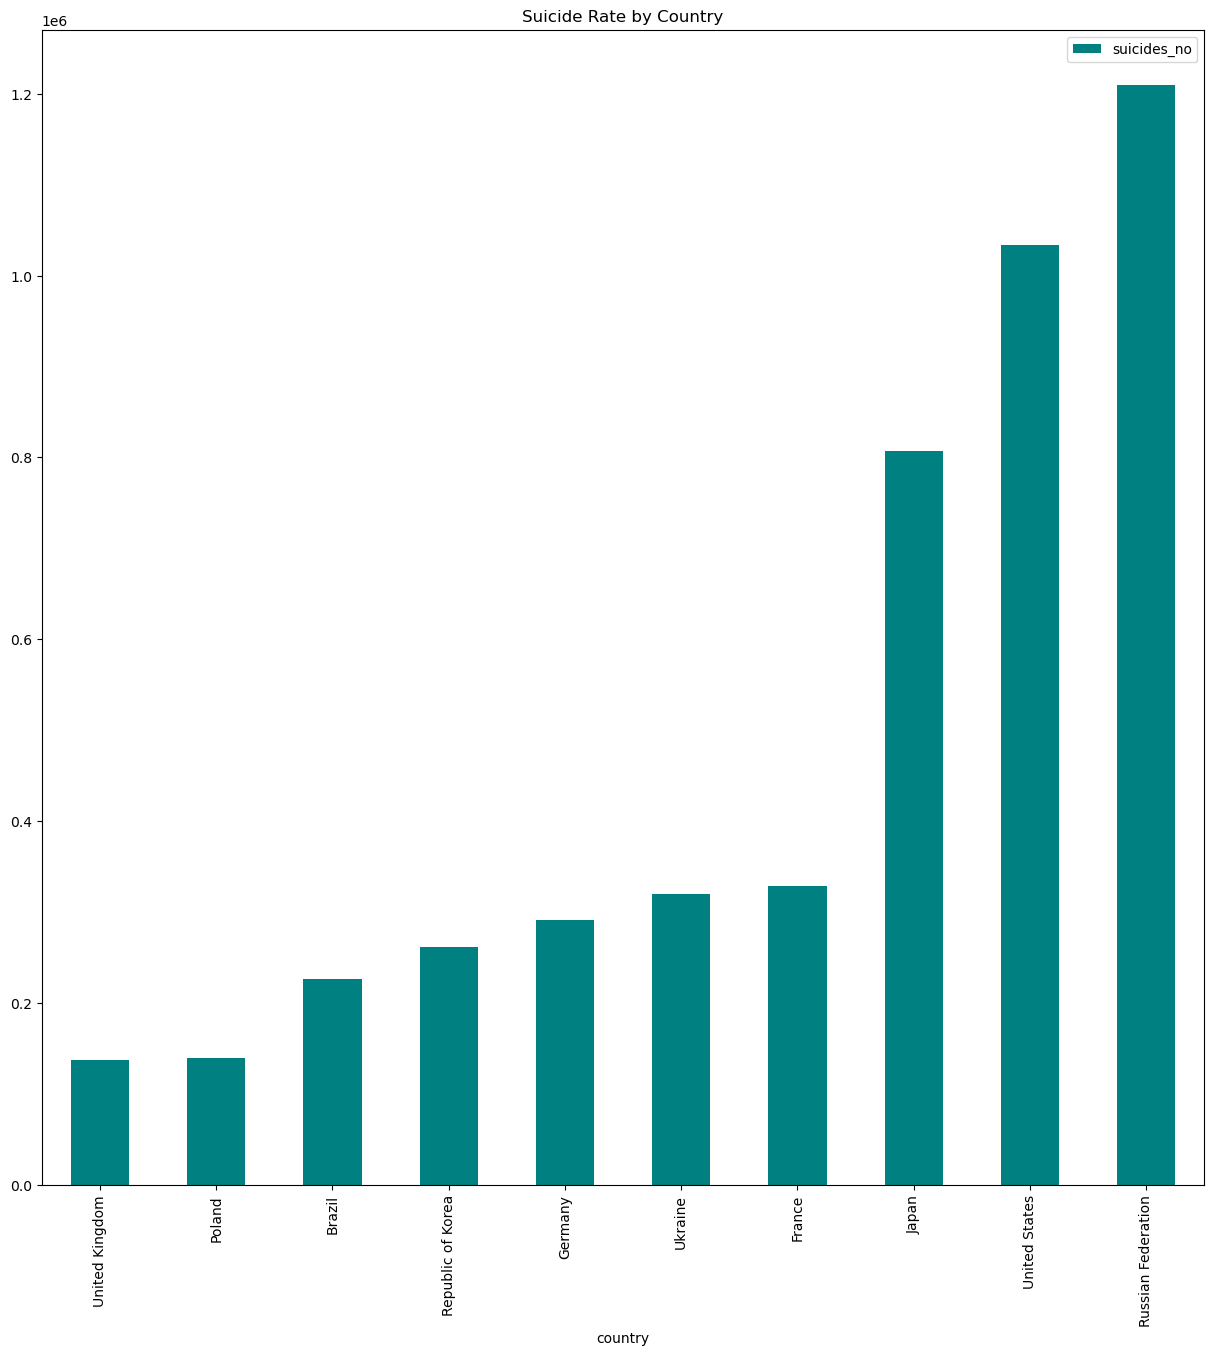

In [62]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',y='suicides_no', title='Suicide Rate by Country', kind='bar', color = 'teal', figsize=(15,15))
plt.show()

In [16]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum() # no of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_index(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10) #getting the top ten countries for suicides

plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country', x='suicides_no', hue='sex',data=most_cont_m, palette='pastel');

plt.ylabel('Count of suicides')
plt.tight_layout()

TypeError: sort_index() got an unexpected keyword argument 'by'

Is there a difference between the suicide rates of men and women?
- More men than women commit suicide

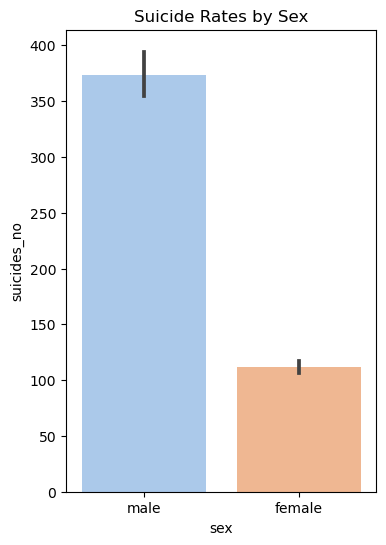

In [94]:
plt.figure(figsize=(4,6))
ax = sns.barplot(x='sex', y='suicides_no', data=data, palette='pastel').set(title='Suicide Rates by Sex')


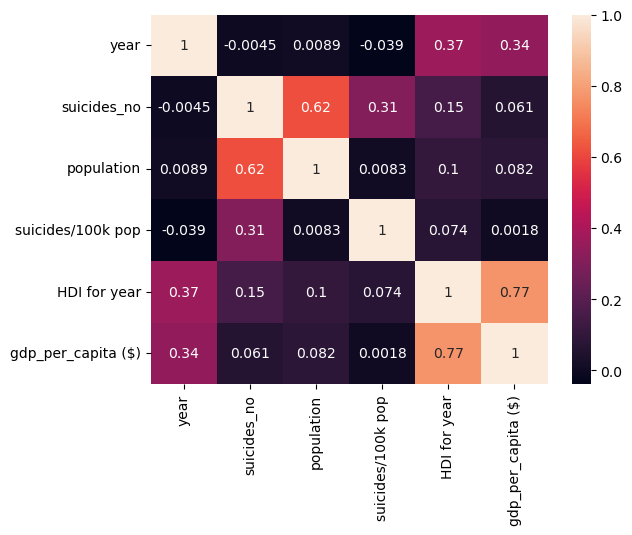

In [86]:
corr_matrix = data.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)
plt.show()

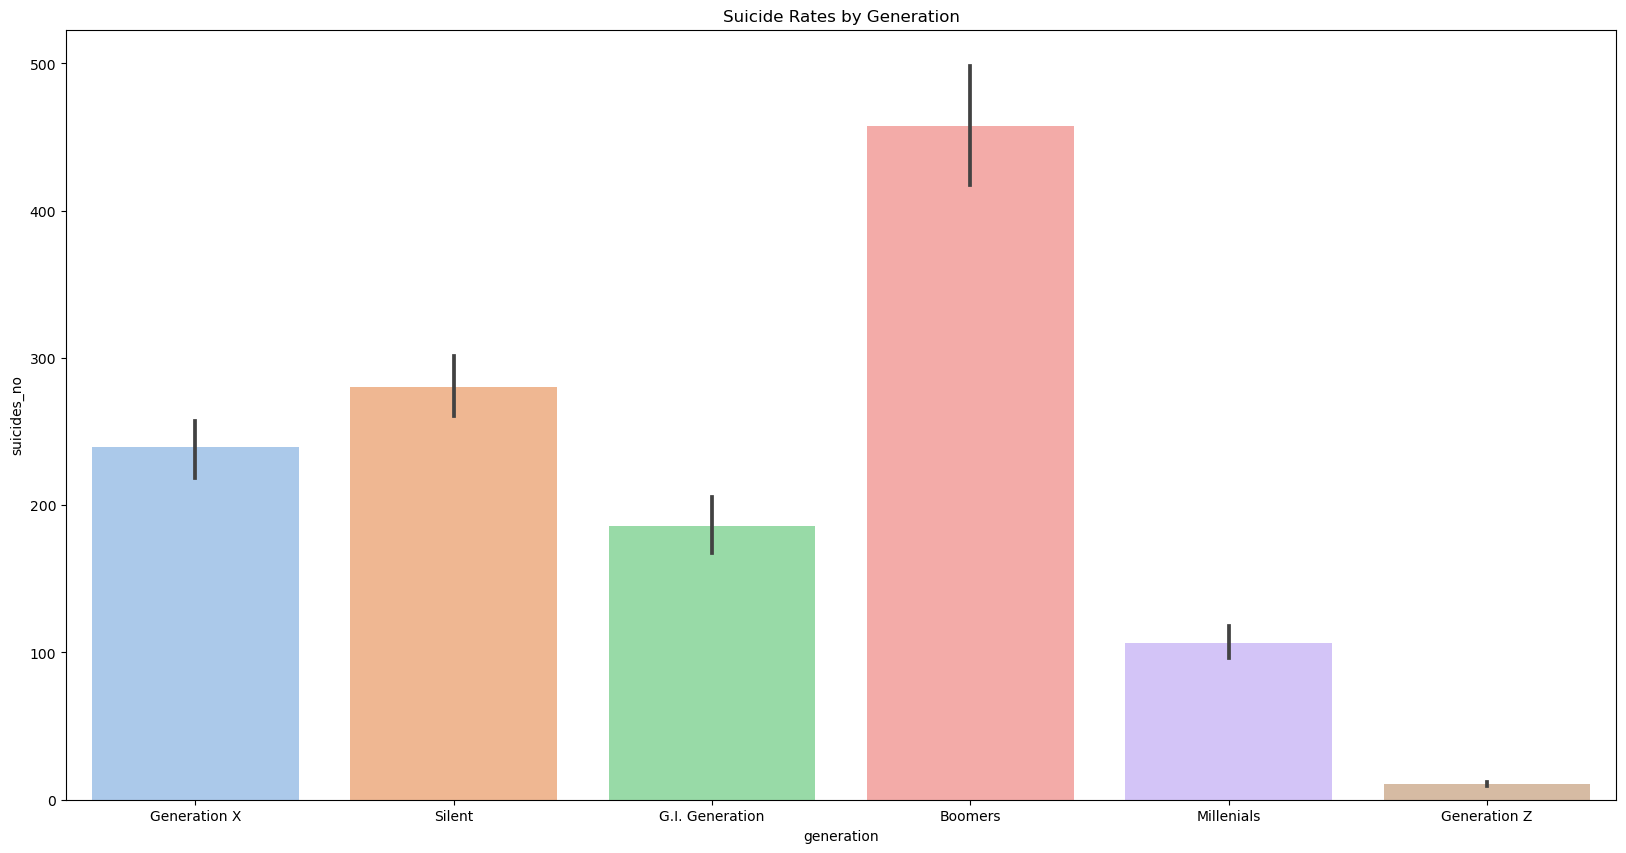

In [93]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='generation', y='suicides_no', data=data, palette='pastel').set(title='Suicide Rates by Generation')

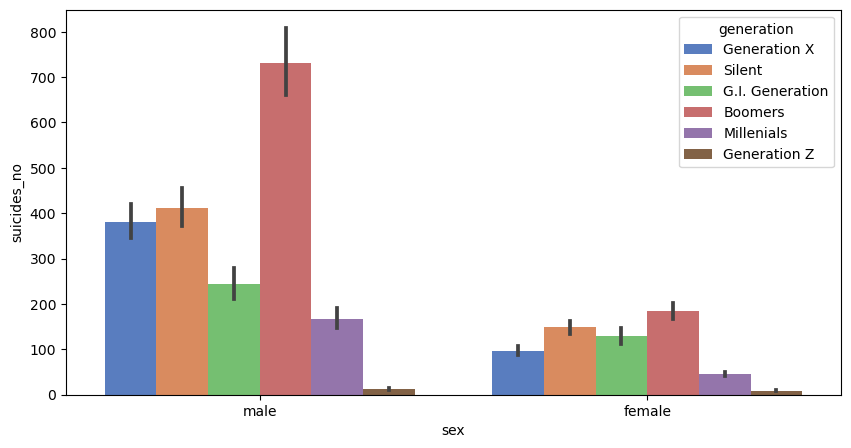

In [15]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='sex', y='suicides_no', hue = 'generation', data=data, palette='muted')
plt.show()

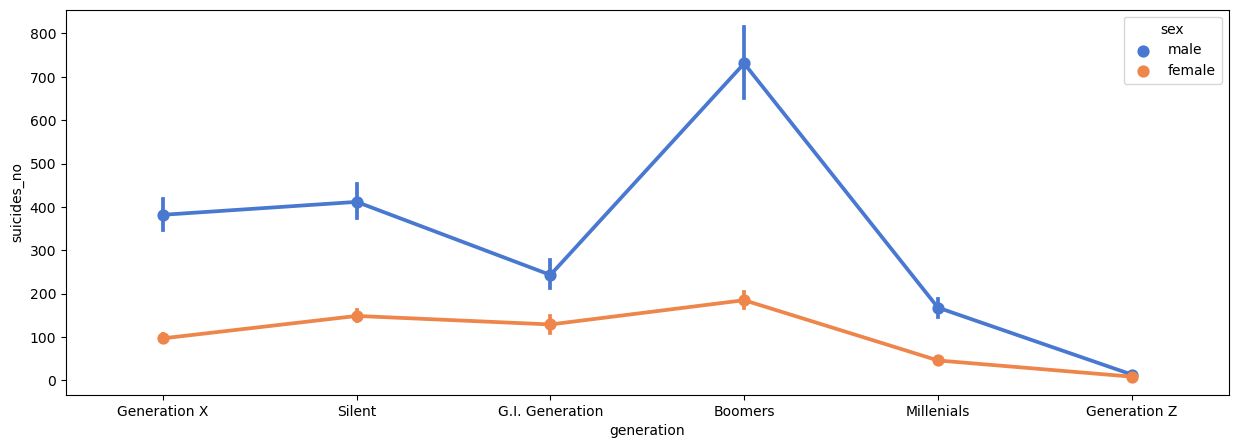

In [18]:
plt.figure(figsize=(15,5))
sns.pointplot(x='generation', y='suicides_no', hue = 'sex', data=data, palette='muted')
plt.show()

In [20]:
plt.figure(figsize=(15,5))
sns.violinplot(x=data.generation, y=['population'])
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1500x500 with 0 Axes>

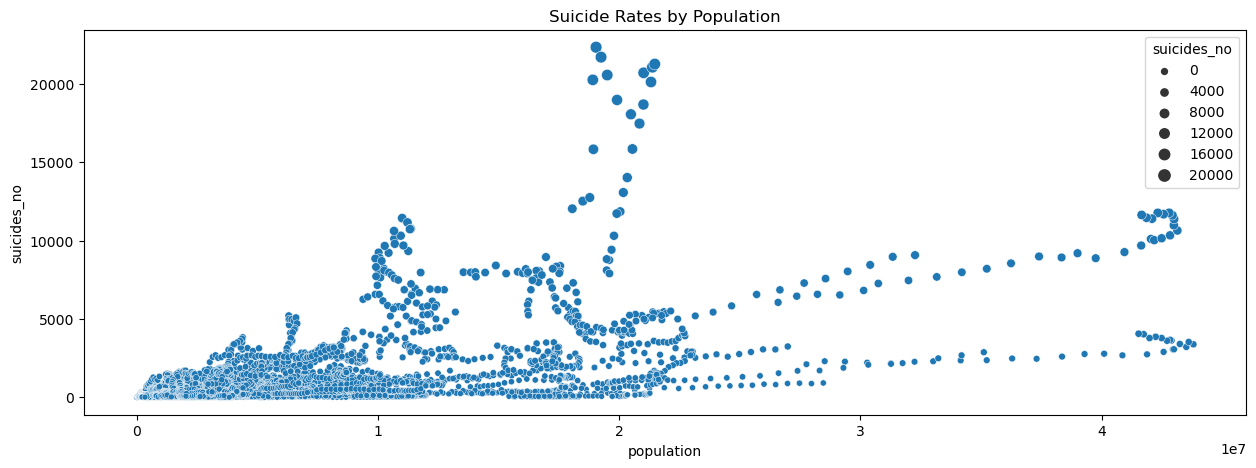

In [105]:
figure = plt.figure(figsize=(15,5))
ax = sns.scatterplot(x=data['population'], y='suicides_no', data=data, size = "suicides_no", palette='pastel').set(title='Suicide Rates by Population')

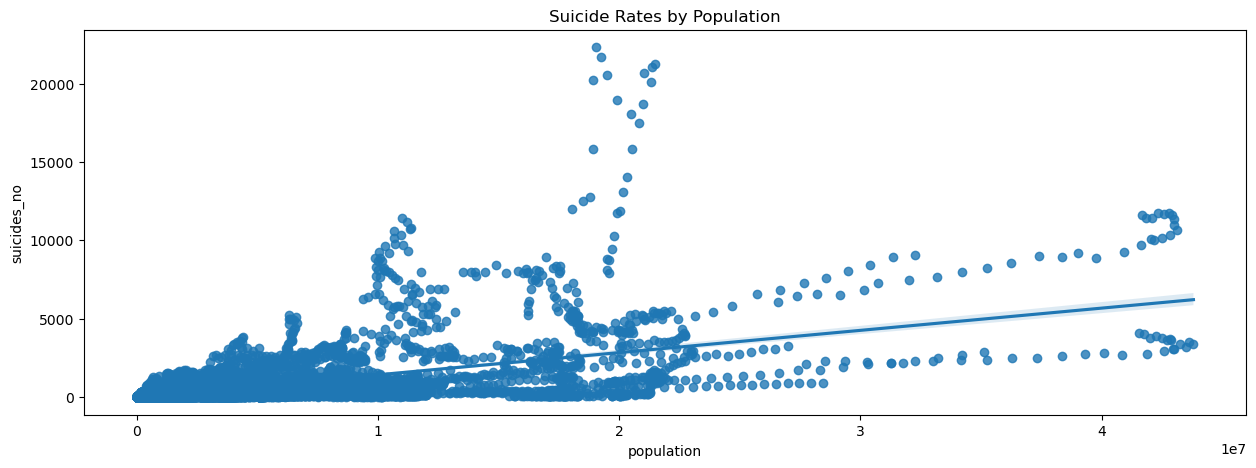

In [104]:
figure = plt.figure(figsize=(15,5))
ax = sns.regplot(x=data['population'], y='suicides_no', data=data).set(title='Suicide Rates by Population')

What is the effect of the GDP of a country on suicide rates?
- There is no significant correlation between GDP and suicide rate

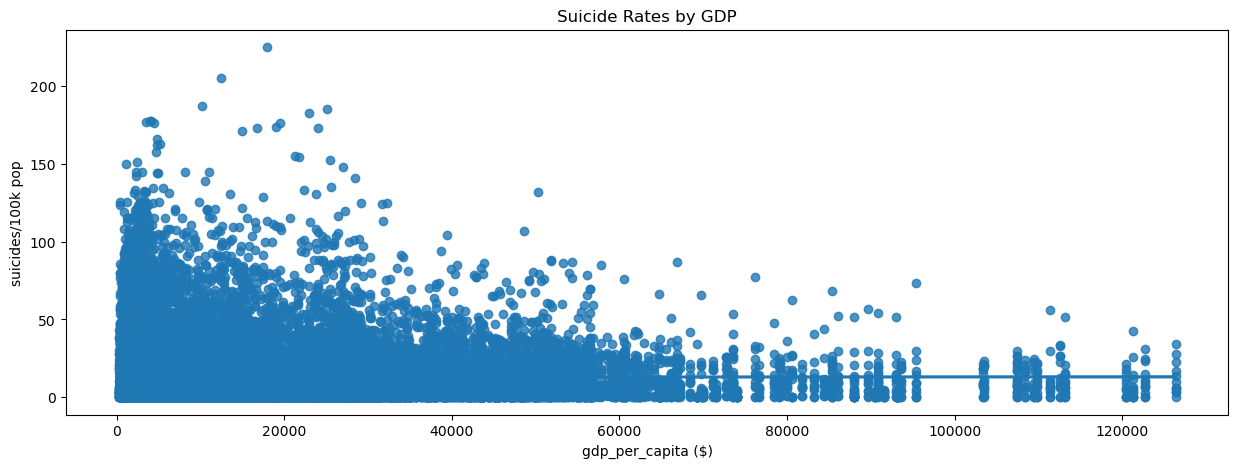

In [113]:
figure = plt.figure(figsize=(15,5))
ax = sns.regplot(x=data['gdp_per_capita ($)'], y='suicides/100k pop', data=data).set(title='Suicide Rates by GDP')

What is the trend of suicide rates across all the years?

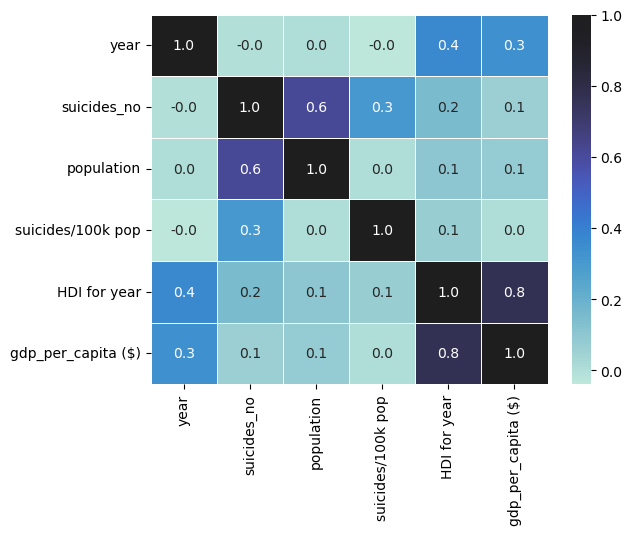

In [11]:
corr_matrix = data.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True, linewidths=.5, fmt='.1f', center = 1)
plt.show()

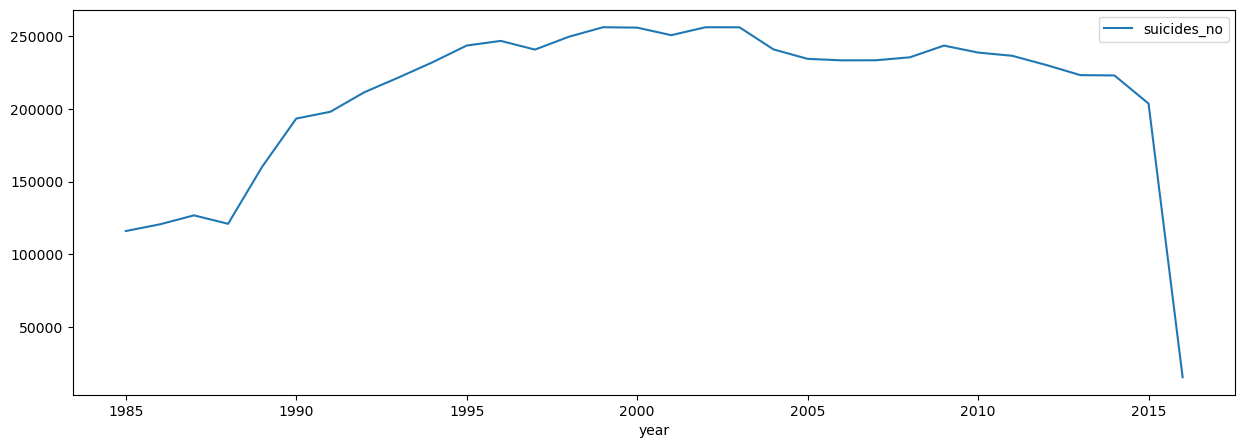

In [21]:
data[['year', 'suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

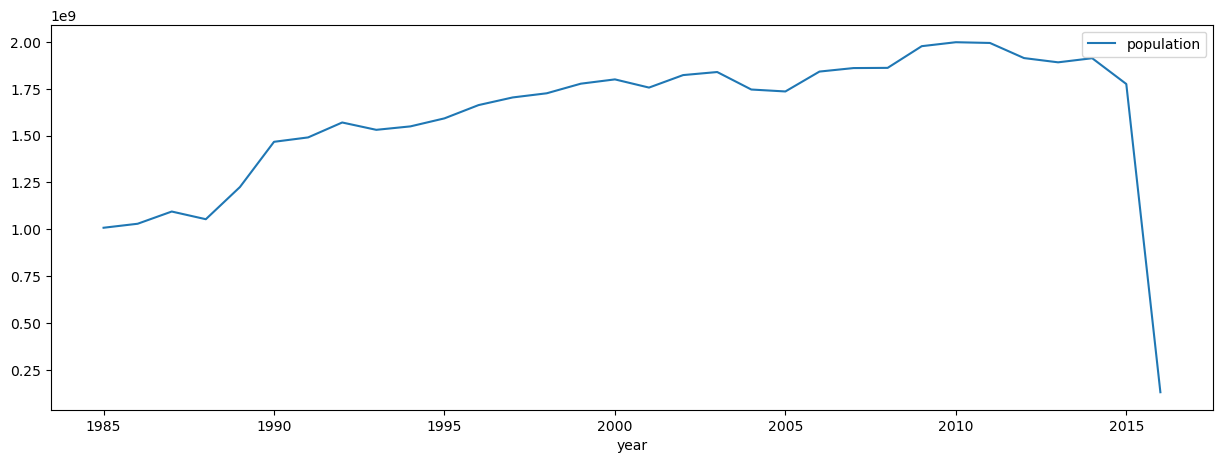

In [22]:
data[['year', 'population']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()

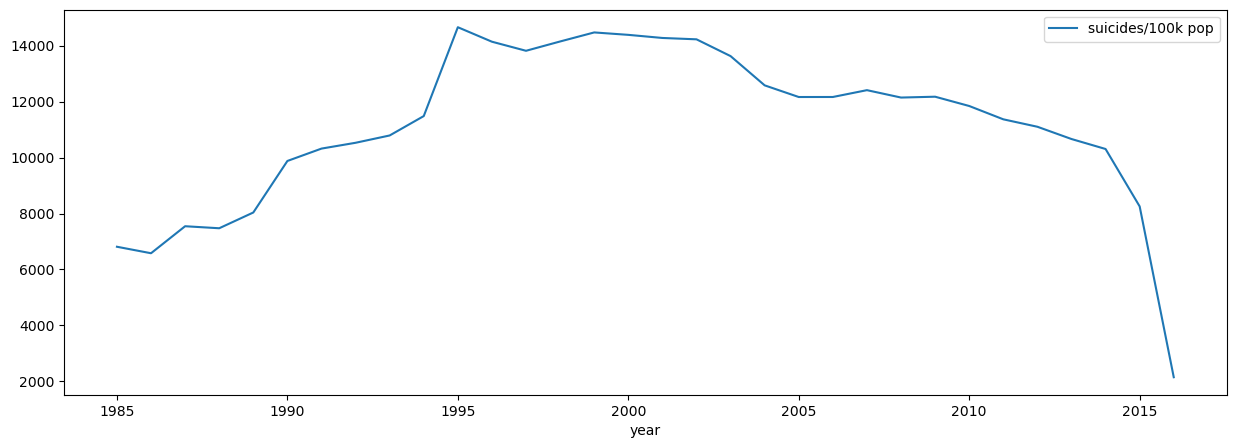

In [23]:
data[['year', 'suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()